# Movielens Dataset Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Loading of datasets : movies, ratings, users

In [3]:
movies = pd.read_csv("movies.dat", sep='::' , header=None, names =['MovieID','Title','Genres'])
ratings = pd.read_csv("ratings.dat" , sep='::' , header=None, names =['UserID','MovieID','Rating','Timestamp'])
users = pd.read_csv("users.dat", sep='::' , header=None, names =['UserID','Gender','Age','Occupation','Zip-code'] )

In [4]:
print(movies.shape)
print(ratings.shape)
print(users.shape)

(3883, 3)
(1000209, 4)
(6040, 5)


In [4]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [6]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


### Merging of all the datasets

In [7]:
finalData = pd.merge(movies,ratings, on='MovieID')
finalData = pd.merge(finalData,users, on='UserID')
finalData.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [8]:
finalData['Rating'].unique()

array([5, 4, 3, 2, 1], dtype=int64)

###	Visualizing user age distribution

(array([ 222.,    0.,    0., 1103., 2096.,    0., 1193.,    0., 1046.,
         380.]),
 array([ 1. ,  6.5, 12. , 17.5, 23. , 28.5, 34. , 39.5, 45. , 50.5, 56. ]),
 <a list of 10 Patch objects>)

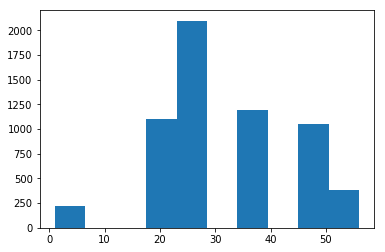

In [9]:
plt.hist(users['Age'])

###	Visualizing overall rating by users

Rating
1     56174
2    107557
3    261197
4    348971
5    226310
Name: UserID, dtype: int64


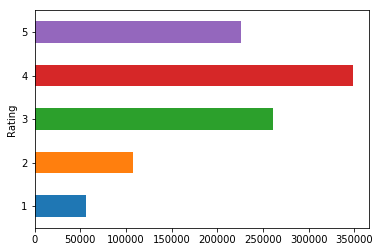

In [10]:
print(finalData.groupby('Rating')['UserID'].count())
finalData.groupby('Rating')['UserID'].count().plot(kind='barh')


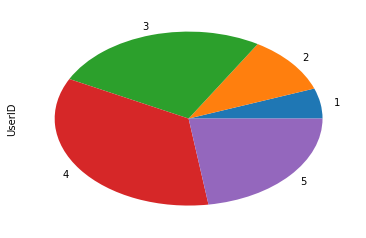

In [11]:
finalData.groupby('Rating')['UserID'].count().plot(kind='pie')

### Visualizing the user rating of the movie “Toy Story”

In [12]:
movieTitles = finalData.Title.unique()
toyMovie = []
for i in movieTitles:
    if i.startswith("Toy") == True:
        toyMovie.append(i)

toyMovie

['Toy Story (1995)', 'Toy Story 2 (1999)', 'Toys (1992)']

Rating
1     16
2     61
3    345
4    835
5    820
Name: UserID, dtype: int64


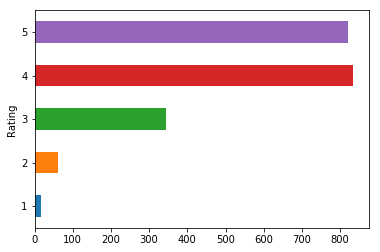

In [13]:
filterDf=finalData[finalData['Title']=='Toy Story (1995)']
print(filterDf.groupby('Rating')['UserID'].count())
filterDf.groupby('Rating')['UserID'].count().plot(kind='barh')

### Visualizing the viewership of the movie “Toy Story” by age group

Age
1     112
18    448
25    790
35    423
45    143
50    108
56     53
Name: UserID, dtype: int64


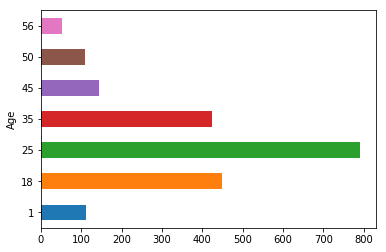

In [14]:
print(filterDf.groupby('Age')['UserID'].count())
filterDf.groupby('Age')['UserID'].count().plot(kind='barh')

### Visualizing the top 25 movies by viewership rating

MovieID
2858    3428
260     2991
1196    2990
1210    2883
480     2672
2028    2653
589     2649
2571    2590
1270    2583
593     2578
1580    2538
1198    2514
608     2513
2762    2459
110     2443
2396    2369
1197    2318
527     2304
1617    2288
1265    2278
1097    2269
2628    2250
2997    2241
318     2227
858     2223
Name: Rating, dtype: int64


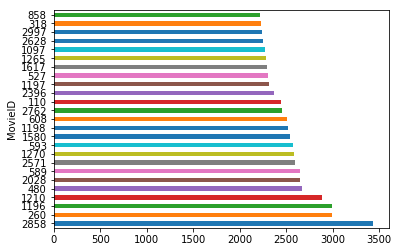

In [15]:
print(finalData.groupby("MovieID")['Rating'].count().nlargest(25))
finalData.groupby("MovieID")['Rating'].count().nlargest(25).plot(kind='barh')

### Rating for a particular user of user id = 2696

In [16]:
finalData[finalData['UserID']==2696]

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
991035,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,973308886,M,25,7,24210
991036,800,Lone Star (1996),Drama|Mystery,2696,5,973308842,M,25,7,24210
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886,M,25,7,24210
991038,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,973308690,M,25,7,24210
991039,1258,"Shining, The (1980)",Horror,2696,4,973308710,M,25,7,24210
991040,1270,Back to the Future (1985),Comedy|Sci-Fi,2696,2,973308676,M,25,7,24210
991041,1589,Cop Land (1997),Crime|Drama|Mystery,2696,3,973308865,M,25,7,24210
991042,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,4,973308842,M,25,7,24210
991043,1625,"Game, The (1997)",Mystery|Thriller,2696,4,973308842,M,25,7,24210
991044,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2696,2,973308920,M,25,7,24210


Rating
1     2
2     3
3     3
4    11
5     1
Name: UserID, dtype: int64


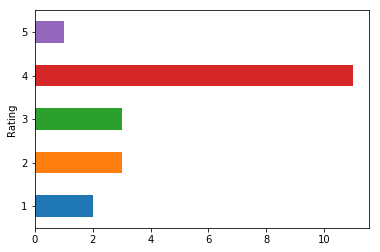

In [17]:
print(finalData[finalData['UserID']==2696].groupby('Rating')['UserID'].count())
finalData[finalData['UserID']==2696].groupby('Rating')['UserID'].count().plot(kind='barh')

### Histogram for movie, age, and occupation


(array([111540.,  88165.,  93040., 152426.,  89853., 106948., 107465.,
         96917.,  85914.,  67941.]),
 array([1.0000e+00, 3.9610e+02, 7.9120e+02, 1.1863e+03, 1.5814e+03,
        1.9765e+03, 2.3716e+03, 2.7667e+03, 3.1618e+03, 3.5569e+03,
        3.9520e+03]),
 <a list of 10 Patch objects>)

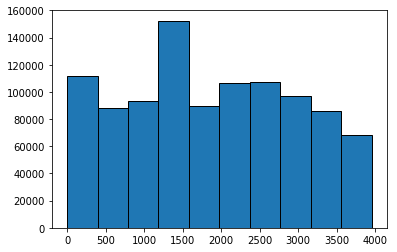

In [27]:
plt.hist(finalData['MovieID'],edgecolor='k')

(array([ 27211.,      0.,      0., 183536., 395556.,      0., 199003.,
             0., 156123.,  38780.]),
 array([ 1. ,  6.5, 12. , 17.5, 23. , 28.5, 34. , 39.5, 45. , 50.5, 56. ]),
 <a list of 10 Patch objects>)

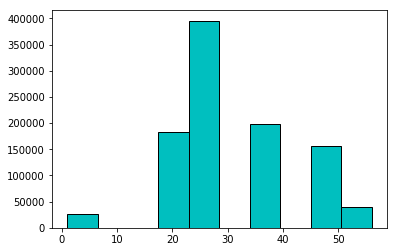

In [28]:
plt.hist(finalData['Age'],color='c',edgecolor='k')

(array([215850.,  81691., 152882., 142630.,  14051.,  43853.,  70968.,
         72060., 118837.,  87387.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <a list of 10 Patch objects>)

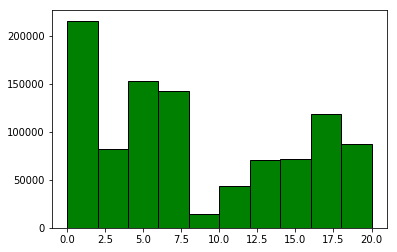

In [29]:
plt.hist(finalData['Occupation'],color='g',edgecolor='k')

### Training of KNN model

In [18]:
features=finalData.iloc[:500,[0,7,8]].values
label=finalData.iloc[:500,[4]].values.reshape(-1,1)

In [19]:
features

array([[   1,    1,   10],
       [  48,    1,   10],
       [ 150,    1,   10],
       ...,
       [1200,   35,    1],
       [1201,   35,    1],
       [1203,   35,    1]], dtype=int64)

In [20]:
#ordinal data 
label

array([[5],
       [5],
       [5],
       [4],
       [5],
       [4],
       [4],
       [4],
       [5],
       [4],
       [3],
       [3],
       [3],
       [4],
       [3],
       [4],
       [4],
       [5],
       [5],
       [5],
       [5],
       [4],
       [5],
       [3],
       [4],
       [4],
       [5],
       [5],
       [4],
       [4],
       [4],
       [5],
       [4],
       [5],
       [4],
       [4],
       [5],
       [4],
       [3],
       [3],
       [5],
       [4],
       [3],
       [4],
       [4],
       [4],
       [4],
       [5],
       [4],
       [5],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [5],
       [5],
       [4],
       [2],
       [4],
       [4],
       [3],
       [4],
       [4],
       [4],
       [3],
       [4],
       [5],
       [4],
       [4],
       [5],
       [4],
       [3],
       [4],
       [4],
       [5],
       [4],
       [5],
       [4],
       [4],
       [3],
       [3],
    

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.25,
                                                random_state=113)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=27)

In [23]:
model.fit(X_train,y_train.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=27, p=2,
           weights='uniform')

In [24]:
#Train score
print(model.score(X_train,y_train))

0.4


In [25]:
#Test score
print(model.score(X_test,y_test))

0.488


In [26]:
##Acceptable model since the test score is greater than train score. 
#Thus concludes the fact that the generated model is Generalized model